In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## **Task 1**

In [ ]:
df = pd.read_csv("pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

<Figure size 2000x2000 with 0 Axes>

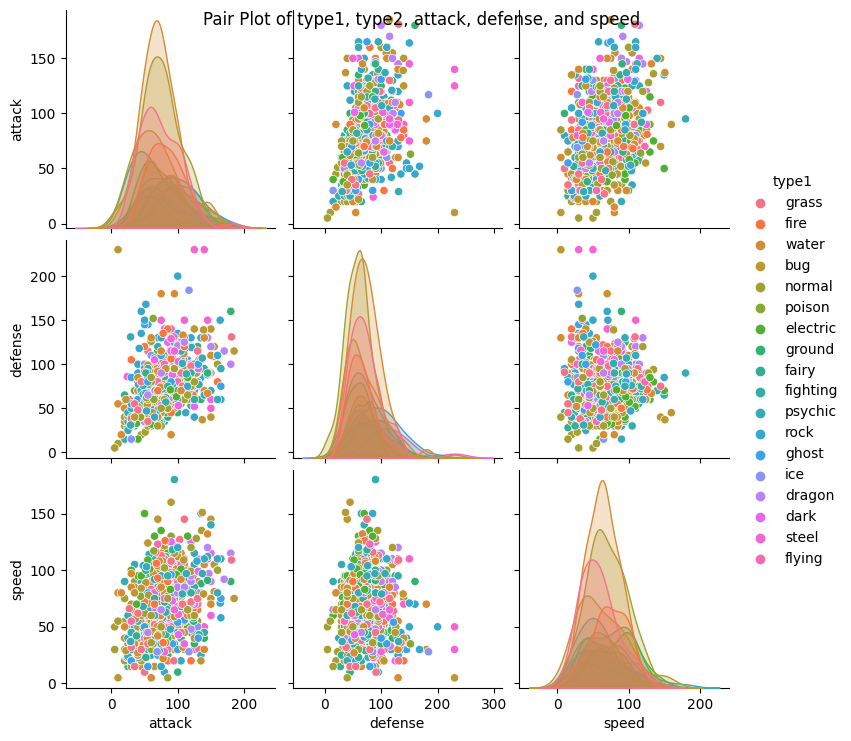

In [ ]:
temp = df[['type1', 'type2', 'attack', 'defense', 'speed']]
plt.figure(figsize=(20,20))
sns.pairplot(temp,hue='type1')
plt.suptitle('Pair Plot of type1, attack, defense, and speed')
plt.show()

<Figure size 2000x2000 with 0 Axes>

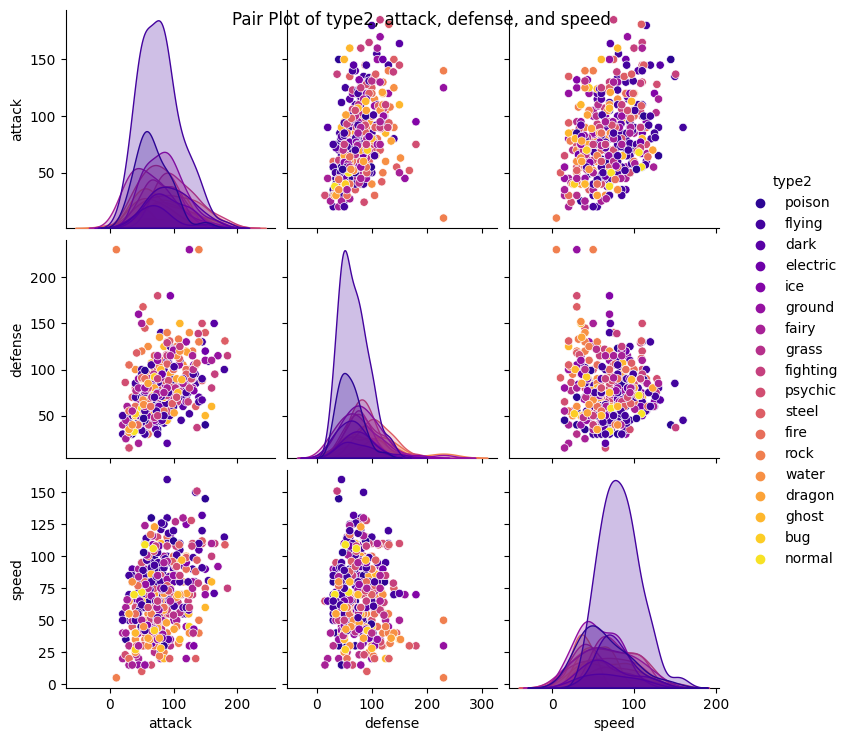

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(temp,hue='type2',palette='plasma')
plt.suptitle('Pair Plot of type2, attack, defense, and speed')
plt.show()

## **Task 2**

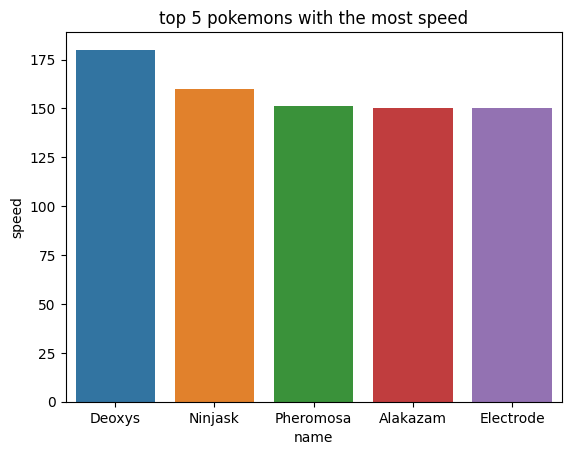

In [ ]:
#Which are top 5 pokemons with the most speed
speed_data = df.groupby('name')['speed'].max()
speed_data = speed_data.sort_values(ascending=False).head(5)
sns.barplot(x=speed_data.index, y=speed_data.values)
plt.title("top 5 pokemons with the most speed")
plt.ylabel('speed')
plt.show()

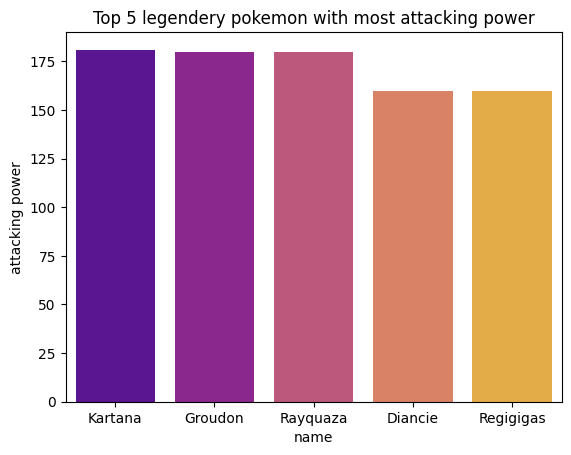

In [ ]:
#Which are top 5 legendery pokemon with most attacking power
atac_data = df[df['is_legendary']==1].groupby('name')['attack'].max()
atac_data = atac_data.sort_values(ascending=False).head(5)
sns.barplot(x=atac_data.index, y=atac_data.values,palette='plasma')
plt.title("Top 5 legendery pokemon with most attacking power")
plt.ylabel('attacking power')
plt.show()

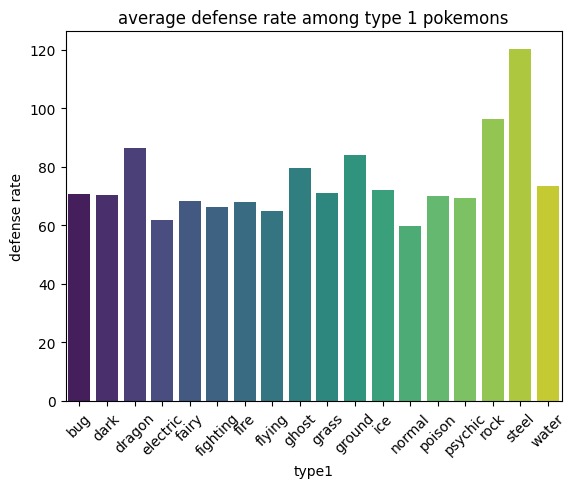

In [ ]:
#What are the average defence rate among type 1 pokemons
def_data = df.groupby('type1')['defense'].mean()
sns.barplot(x=def_data.index, y=def_data.values,palette='viridis')
plt.title("average defense rate among type 1 pokemons")
plt.ylabel('defense rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#How does the Pokémon's 'capture_rate' relate to its 'base_total' stats? Does a higher capture rate imply higher overall strength?
df['capture_rate'].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [ ]:
df['capture_rate'] = df['capture_rate'].str.replace(r'\D+', '').astype('int')

<ipython-input-85-e23ee390d3ed>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['capture_rate'] = df['capture_rate'].str.replace(r'\D+', '').astype('int')


In [ ]:
correlation = df['capture_rate'].corr(df['base_total'])
print("Correlation between 'capture_rate' and 'base_total':", correlation)

Correlation between 'capture_rate' and 'base_total': -0.029590217223059663


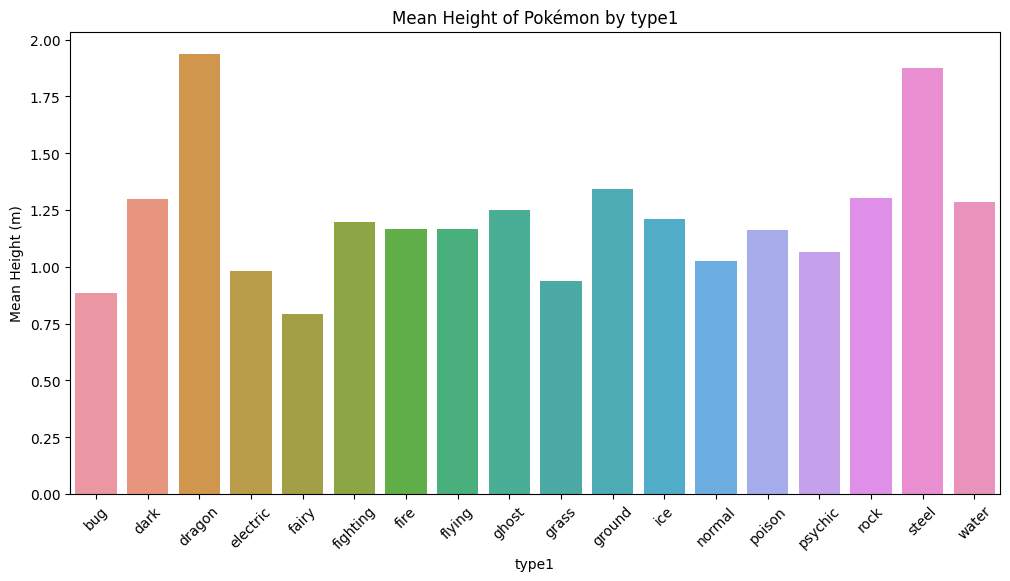

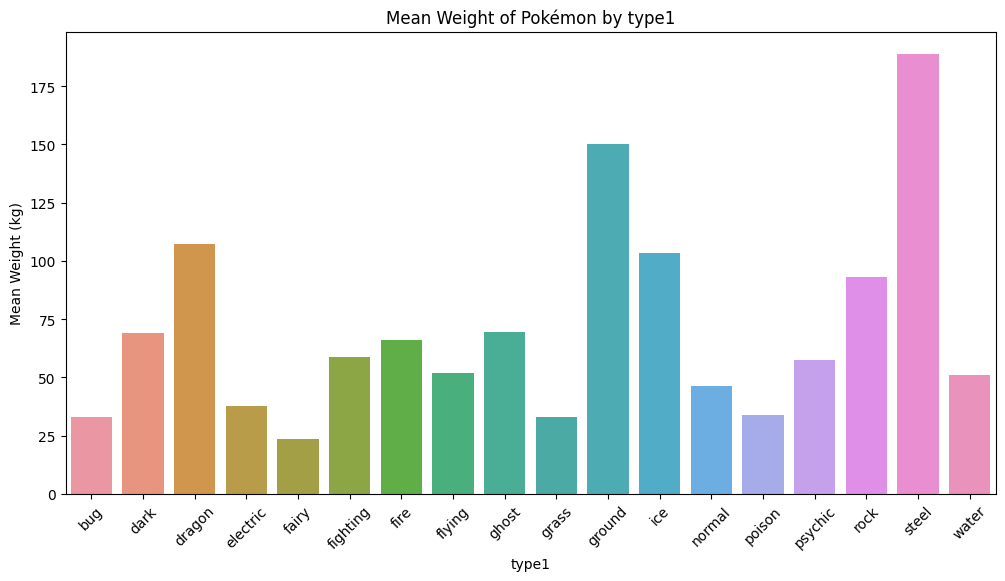

Correlation between height_m and weight_kg for type1 :
type1             
bug       height_m    0.728702
dark      height_m    0.797150
dragon    height_m    0.620916
electric  height_m    0.680098
fairy     height_m    0.910720
fighting  height_m    0.813171
fire      height_m    0.669034
flying    height_m    0.960769
ghost     height_m    0.792405
grass     height_m    0.702700
ground    height_m    0.783244
ice       height_m    0.761436
normal    height_m    0.786837
poison    height_m    0.675287
psychic   height_m    0.196635
rock      height_m    0.489922
steel     height_m    0.814927
water     height_m    0.814771
Name: weight_kg, dtype: float64


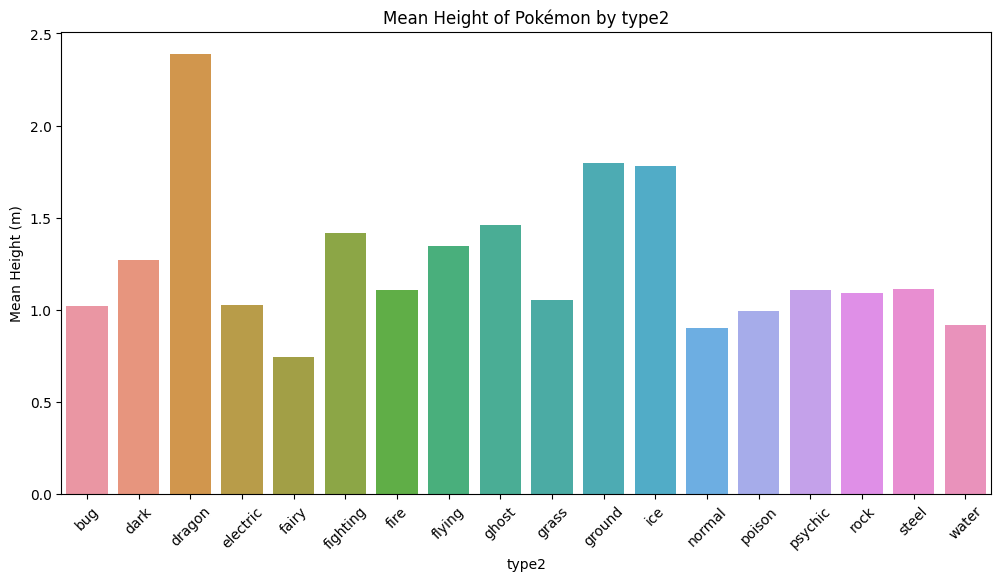

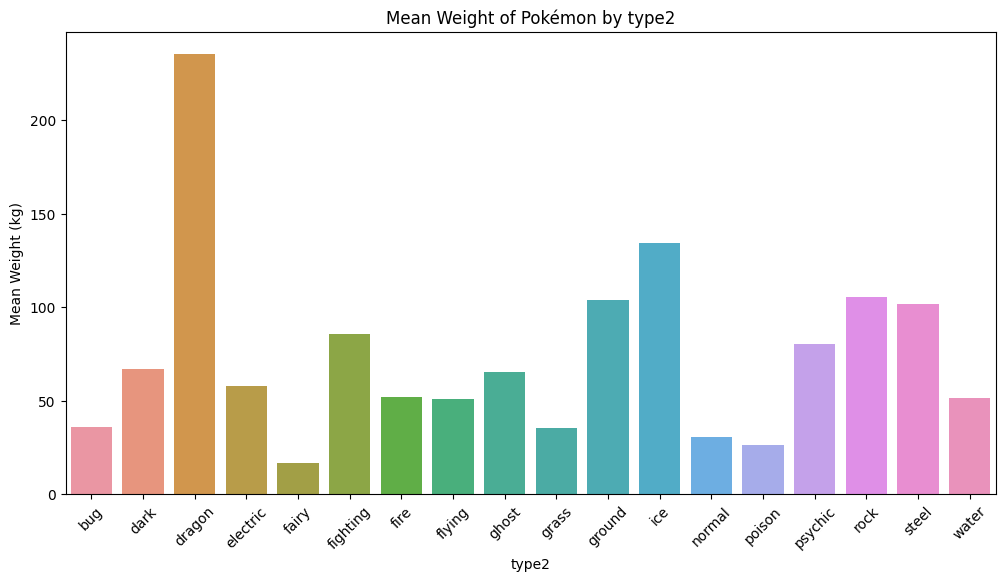

Correlation between height_m and weight_kg for type2 :
type2             
bug       height_m    0.974684
dark      height_m    0.787344
dragon    height_m    0.941573
electric  height_m    0.914481
fairy     height_m    0.725991
fighting  height_m    0.777535
fire      height_m    0.920839
flying    height_m    0.843311
ghost     height_m    0.697719
grass     height_m    0.966425
ground    height_m    0.726921
ice       height_m    0.935723
normal    height_m    0.945540
poison    height_m    0.726652
psychic   height_m    0.354311
rock      height_m    0.860298
steel     height_m    0.605580
water     height_m    0.845123
Name: weight_kg, dtype: float64


In [ ]:
#How do the 'height_m' and 'weight_kg' of Pokémon vary across different 'types'? Is there correlation between a Pokémon's type and its physical size?
types = ['type1','type2']
for t in types:
  mean_height_weight_by_type = df.groupby(t)[['height_m', 'weight_kg']].mean()

  plt.figure(figsize=(12, 6))
  sns.barplot(x=mean_height_weight_by_type.index, y=mean_height_weight_by_type['height_m'])
  plt.xticks(rotation=45)
  plt.xlabel(t)
  plt.ylabel('Mean Height (m)')
  plt.title('Mean Height of Pokémon by '+t)
  plt.show()

  plt.figure(figsize=(12, 6))
  sns.barplot(x=mean_height_weight_by_type.index, y=mean_height_weight_by_type['weight_kg'])
  plt.xticks(rotation=45)
  plt.xlabel(t)
  plt.ylabel('Mean Weight (kg)')
  plt.title('Mean Weight of Pokémon by '+t)
  plt.show()

  correlation_type = df.groupby(t)[['height_m', 'weight_kg']].corr().iloc[0::2, -1]

# Display correlation coefficients for 'height_m' and 'weight_kg'
  print("Correlation between height_m and weight_kg for",t,":")
  print(correlation_type)